In [93]:
import numpy as np
import pylab as plt

points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]
goal = 7

{0: Text(-0.3411404424202364, -0.4599179435587697, '0'),
 1: Text(-0.063018964371773, -0.08491725706656962, '1'),
 5: Text(-0.47086443481551404, 0.41381641932522606, '5'),
 6: Text(-0.9426185709312142, 0.5285699229273113, '6'),
 4: Text(-0.4948677186087104, 0.8952728786404486, '4'),
 2: Text(0.5325520693130968, -0.33064545425966635, '2'),
 3: Text(0.7799580618343515, -0.7489499616894263, '3'),
 7: Text(1.0, -0.21322860431855387, '7')}

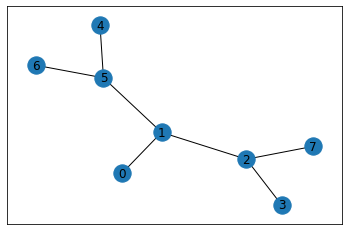

In [94]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
#plt.show()

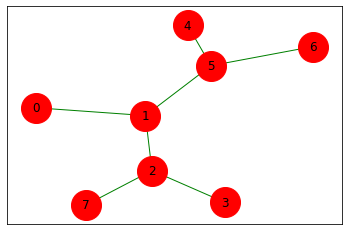

In [95]:
from matplotlib.pylab import size
import networkx as nx
G = nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=900, node_color='red')
nx.draw_networkx_edges(G, pos, edge_color="green")
nx.draw_networkx_labels(G, pos)
plt.show()

In [96]:
print(G)
G

Graph with 8 nodes and 7 edges


In [97]:
MATRIX_SIZE = 8
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R

matrix([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])

In [98]:
R *= -1

In [99]:
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [100]:
for point in points_list:
  print(point)
  if point[1]:
    R[point] = 100
    print(f"para point[1] {point}")
  else:
    R[point] = 0
    print(f"para point[1]bis {point}")
    
  if point[0] == goal:
    R[point[: :-1]] = 100
    print(f"para point[0] {point}")
  else:
    R[point[: :-1]] = 0
    print(f"para point[0]bis {point}")

(0, 1)
para point[1] (0, 1)
para point[0]bis (0, 1)
(1, 5)
para point[1] (1, 5)
para point[0]bis (1, 5)
(5, 6)
para point[1] (5, 6)
para point[0]bis (5, 6)
(5, 4)
para point[1] (5, 4)
para point[0]bis (5, 4)
(1, 2)
para point[1] (1, 2)
para point[0]bis (1, 2)
(2, 3)
para point[1] (2, 3)
para point[0]bis (2, 3)
(2, 7)
para point[1] (2, 7)
para point[0]bis (2, 7)


In [101]:
R[goal, goal] = 100

In [102]:
R

matrix([[ -1., 100.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1., 100.,  -1.,  -1., 100.,  -1.,  -1.],
        [ -1.,   0.,  -1., 100.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1., 100.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [103]:
Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gamma = 0.8

In [104]:
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [105]:
initial_state = 1
def avaiable_actions(state):
  current_state_row = R[state,]
  av_act = np.where(current_state_row >= 0) [1]
  return av_act

avaiable_act = avaiable_actions(initial_state)

In [106]:
print(avaiable_act)
avaiable_act

[0 2 5]


array([0, 2, 5])

In [107]:
def sample_next_action(avaiable_actions_range):
  next_action = int(np.random.choice(avaiable_act, 1))
  return next_action

In [108]:
action = sample_next_action(avaiable_act)
action

2

In [109]:
print(avaiable_act)

[0 2 5]


In [110]:
def update(current_state, action, gamma):
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  if max_index.shape[0] > 1:
    max_index = int(np.random.choice(max_index, size = 1))
  else:
    max_index = int(max_index)
  max_value = Q[action, max_index]

  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  if(np.max(Q) > 0):
    return(np.sum(Q/np.max(Q) * 100))
  else:
    return 0

  update(initial_state, action, gamma)

In [111]:
print('max_value', R[initial_state, action] + gamma * gamma)
print(action)
print(initial_state)
print(Q[action,], type(Q[action,]))
print(update(initial_state, action, gamma))

max_value 100.64
2
1
[[0. 0. 0. 0. 0. 0. 0. 0.]] <class 'numpy.matrix'>
max_value 100.0
100.0


In [112]:
print(update(initial_state, action, gamma))

max_value 100.0
100.0


In [147]:
# Training
scores = []
for i in range(700):
  current_state = np.random.randint(0, int(Q.shape[0]))
  avaiable_act = avaiable_actions(current_state)
  action = sample_next_action(avaiable_act)
  score = update(current_state, action, gamma)
  scores.append(score)
  print(i, " Score: ", str(score), str(scores), action)
  print(avaiable_actions(avaiable_act), current_state, avaiable_act)
  print(Q)
  print("\n")

Streaming output truncated to the last 5000 lines.
[0 2 5 2 2 7] 2 [1 3 7]
[[  0.         499.94961694   0.           0.           0.
    0.           0.           0.        ]
 [399.95969355   0.         499.93702118   0.           0.
  419.95969355   0.           0.        ]
 [  0.         399.94961694   0.         419.96775484   0.
    0.           0.         499.94961694]
 [  0.           0.         399.95969355   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
  319.95969355   0.           0.        ]
 [  0.         399.94961694   0.           0.         355.84624311
    0.         355.96775484   0.        ]
 [  0.           0.           0.           0.           0.
  319.95969355   0.           0.        ]
 [  0.           0.         399.95969355   0.           0.
    0.           0.         499.94961694]]


max_value 319.9596935536383
246  Score:  1238.369789714708 [1230.7888970522479, 1230.7888970522479, 1230.7

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [148]:
print("Trained Q matrix: ")
print(Q/np.max(Q) * 100)

Trained Q matrix: 
[[  0.         100.           0.           0.           0.
    0.           0.           0.        ]
 [ 80.           0.          99.99999513   0.           0.
   83.99999201   0.           0.        ]
 [  0.          79.99998514   0.          83.99998592   0.
    0.           0.         100.        ]
 [  0.           0.          79.99999123   0.           0.
    0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
   63.99999688   0.           0.        ]
 [  0.          79.9999961    0.           0.          71.2000014
    0.          71.2000014    0.        ]
 [  0.           0.           0.           0.           0.
   63.99999688   0.           0.        ]
 [  0.           0.          80.           0.           0.
    0.           0.          99.99999513]]


In [149]:
len(Q/np.max(Q) *100)

8

In [150]:
(Q/np.max(Q) *100)

matrix([[  0.        , 100.        ,   0.        ,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [ 80.        ,   0.        ,  99.99999513,   0.        ,
           0.        ,  83.99999201,   0.        ,   0.        ],
        [  0.        ,  79.99998514,   0.        ,  83.99998592,
           0.        ,   0.        ,   0.        , 100.        ],
        [  0.        ,   0.        ,  79.99999123,   0.        ,
           0.        ,   0.        ,   0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,  63.99999688,   0.        ,   0.        ],
        [  0.        ,  79.9999961 ,   0.        ,   0.        ,
          71.2000014 ,   0.        ,  71.2000014 ,   0.        ],
        [  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,  63.99999688,   0.        ,   0.        ],
        [  0.        ,   0.        ,  80.        ,   0.        ,
           0.     

In [151]:
type((Q/np.max(Q) *100))

numpy.matrix

Most efficient path: 
[0, 1, 2, 7]


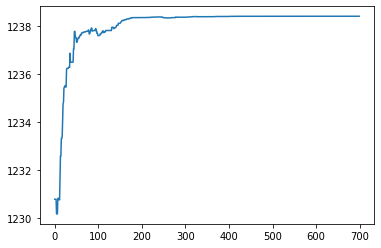

In [152]:
# Testing
current_state = 0
steps = [current_state]
while current_state != 7:
  next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
  if next_step_index.shape[0] > 1:
    next_step_index = int(np.random.choice(next_step_index, size = 1))
  else:
    next_step_index = int(next_step_index)
  steps.append(next_step_index)
  current_state = next_step_index

print("Most efficient path: ")
print(steps)
plt.plot(scores)
plt.show()

Most efficient path: 
[0, 1, 2, 7]


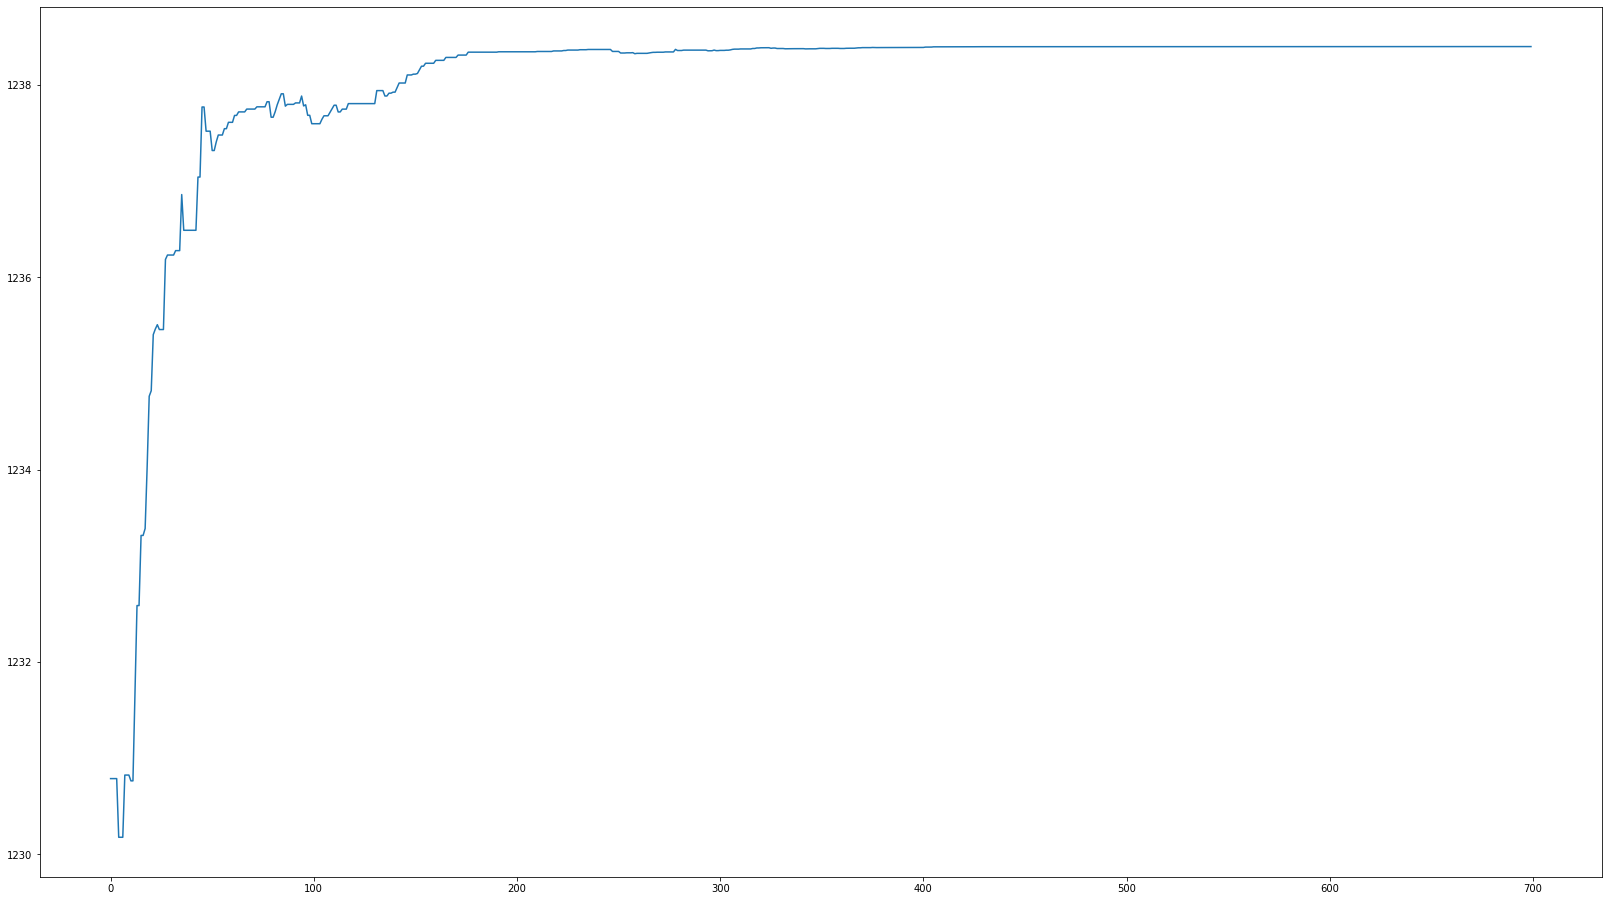

In [153]:
current_state = 0
steps = [current_state]
while current_state != 7:
  next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
  if next_step_index.shape[0] > 1:
    next_step_index = int(np.random.choice(next_step_index, size = 1))
  else:
    next_step_index = int(next_step_index)
  steps.append(next_step_index)
  current_state = next_step_index

print("Most efficient path: ")
print(steps)
plt.figure(figsize=(28, 16))
plt.plot(scores)
plt.show()

SOLUTION LAB 9 from MOODLE

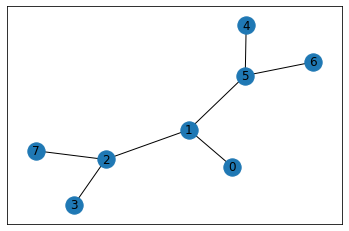

In [156]:
import numpy as np
import pylab as plt

# map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,5), (5,6), (5,4), (1,2), (2,3), (2,7)]

# !pip install networkx
goal = 7
import networkx as nx
G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [157]:
# how many points in graph? x points
MATRIX_SIZE = 8

# create matrix x*y
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1

R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [158]:
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    print(point)
    if point[1] == goal:
        R[point] = 100
    else:
        R[point] = 0

    if point[0] == goal:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0

# add goal point round trip
R[goal,goal]= 100

R

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(2, 3)
(2, 7)


matrix([[ -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1., 100.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.]])

In [159]:
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.8

initial_state = 1

def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)

def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
  
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100))
  else:
    return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 100.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 180.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 0.0
Score: 155.55555555555554
max_value 144.0
Score: 235.55555555555554
max_value 180.0
Score: 280.0
max_value 115.2
Score: 344.0
max_value 0.0
Score: 344.0
max_value 92.16000000000001
Score: 395.2
max_value 92.16000000000001
Score: 395.2
max_value 0.0
Score: 395.2
max_value 0.0
Score: 395.2
max_value 0.0
Score: 395.2
max_value 144.0
Score: 395.2
max_value 144.0
Score: 475.2
max_value 115.2
Score: 539.2
max_value 92.16000000000001
Score: 539.2
max_value 115.2
Score: 603.2
max_value 244.0
Score: 471.21311475409834
max_value 92.16000000000001
Score: 508

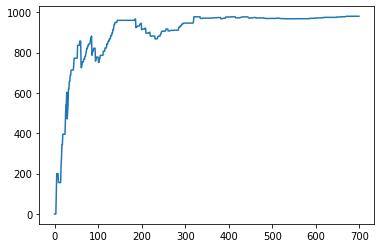

In [160]:
# Training
scores = []
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    score = update(current_state,action,gamma)
    scores.append(score)
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]

while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps)

plt.plot(scores)
plt.show()

In [1]:
# ---------------- Part 2: Solution for Activity --------------------

import numpy as np

# R matrix
R = np.matrix([ [-1,-1,-1,-1,0,-1],
		[-1,-1,-1,0,-1,100],
		[-1,-1,-1,0,-1,-1],
		[-1,0,0,-1,0,-1],
		[-1,0,0,-1,-1,100],
		[-1,0,-1,-1,0,100] ])

# Q matrix
Q = np.matrix(np.zeros([6,6]))

# Gamma (learning parameter).
gamma = 0.8

# Initial state. (Usually to be chosen at random)
initial_state = 1

# This function returns all available actions in the state given as an argument
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

# Get available actions in the current state
available_act = available_actions(initial_state) 

# This function chooses at random which action to be performed within the range 
# of all the available actions.
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

# Sample next action to be performed
action = sample_next_action(available_act)

# This function updates the Q matrix according to the path selected and the Q 
# learning algorithm
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    
    # Q learning formula
    Q[current_state, action] = R[current_state, action] + gamma * max_value

# Update Q matrix
update(initial_state,action,gamma)

#-------------------------------------------------------------------------------
# Training

# Train over 10 000 iterations. (Re-iterate the process above).
for i in range(10000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state)
    action = sample_next_action(available_act)
    update(current_state,action,gamma)
    
# Normalize the "trained" Q matrix
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

#-------------------------------------------------------------------------------
# Testing

# Goal state = 5
# Best sequence path starting from 2 -> 2, 3, 1, 5

current_state = 2
steps = [current_state]

while current_state != 5:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

# Print selected sequence of steps
print("Selected path:")
print(steps)

#-------------------------------------------------------------------------------
#                               OUTPUT
#-------------------------------------------------------------------------------
#
# Trained Q matrix:
#[[   0.     0.     0.     0.    80.     0. ]
# [   0.     0.     0.    64.     0.   100. ]
# [   0.     0.     0.    64.     0.     0. ]
# [   0.    80.    51.2    0.    80.     0. ]
# [   0.    80.    51.2    0.     0.   100. ]
# [   0.    80.     0.     0.    80.   100. ]]
#
# Selected path:
# [2, 3, 1, 5]
# 

Trained Q matrix:
[[  0.    0.    0.    0.   80.    0. ]
 [  0.    0.    0.   64.    0.  100. ]
 [  0.    0.    0.   64.    0.    0. ]
 [  0.   80.   51.2   0.   80.    0. ]
 [  0.   80.   51.2   0.    0.  100. ]
 [  0.   80.    0.    0.   80.  100. ]]
Selected path:
[2, 3, 1, 5]


ACTIVITY made by ME:

In [165]:
# FROM 2 to 5
R


matrix([[ -1,  -1,  -1,  -1,   0,  -1],
        [ -1,  -1,  -1,   0,  -1, 100],
        [ -1,  -1,  -1,   0,  -1,  -1],
        [ -1,   0,   0,  -1,   0,  -1],
        [ -1,   0,   0,  -1,  -1, 100],
        [ -1,   0,  -1,  -1,   0, 100]])

In [166]:
Q

matrix([[  0.,   0.,   0.,   0., 400.,   0.],
        [  0.,   0.,   0., 320.,   0., 500.],
        [  0.,   0.,   0., 320.,   0.,   0.],
        [  0., 400., 256.,   0., 400.,   0.],
        [  0., 400., 256.,   0.,   0., 500.],
        [  0., 400.,   0.,   0., 400., 500.]])